In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

import sys
sys.path.append("../../..")
from utils import postprocessing_utils as post
import utils.plotting_utils.plots as plots

In [2]:
def make_plot(task, short_model_name, metric, fit_reg=False):
    params = {
        "results_dir": "../../../results/",
        "experiment": "acl",
        "short_model_name": short_model_name,
        "task": task,
        "metric": metric
    }

    M = post.Metrics(**params)

    df_within = M.within_score()
    df_cross = M.cross_score(grouped_test=True)
    df_cross = df_cross.groupby("Train-Language", sort=False, as_index=False).mean()
    df = pd.concat([df_within, df_cross["Cross-Score"]], axis=1)
    df.iloc[:, 2:] *= 100
    plots.scatter(x="Within-Score",
                  y="Cross-Score",
                  data=df,
                  xaxis_title="In-language Score",
                  yaxis_title="Average Cross-language Score",
                  title=task.upper() + " " + short_model_name.upper(),
                  fit_reg=fit_reg)
    
    print(pearsonr(x=df["Within-Score"], y=df["Cross-Score"]))

# PoS

(-0.04268059696851822, 0.8707974949050306)


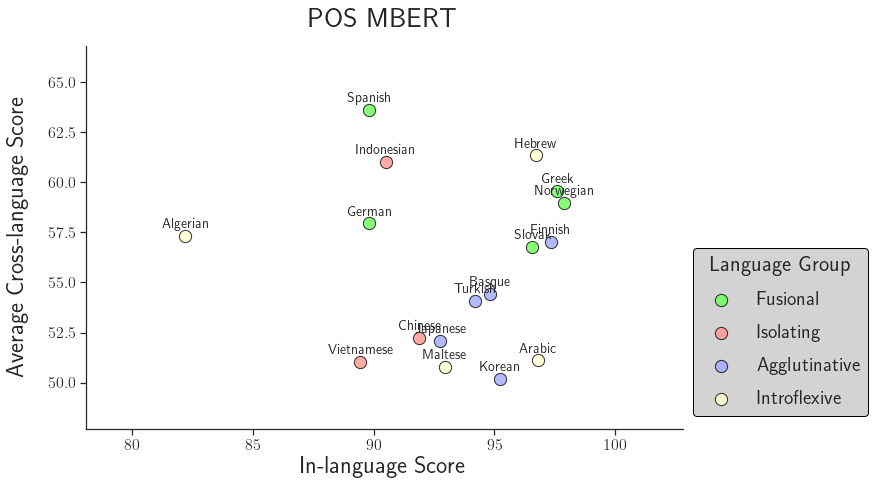

In [6]:
make_plot("pos", "mbert", "Accuracy")
plt.savefig("../../../results/acl/mbert/plots/within_vs_cross_pos.pdf", dpi=400, bbox_inches="tight")

(-0.003459905247932049, 0.9894850860163326)


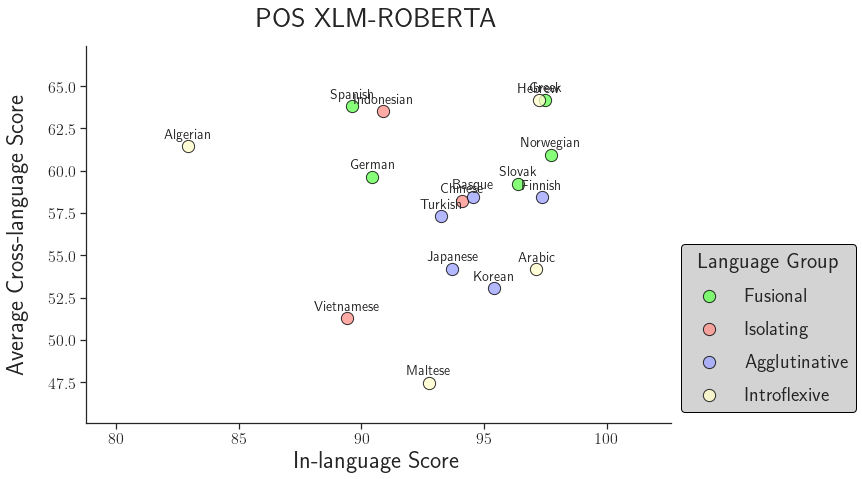

In [7]:
make_plot("pos", "xlm-roberta", "Accuracy")
plt.savefig("../../../results/acl/xlm-roberta/plots/within_vs_cross_pos.pdf", dpi=400, bbox_inches="tight")

# Sentiment

(0.2534284027176441, 0.2951510074315274)


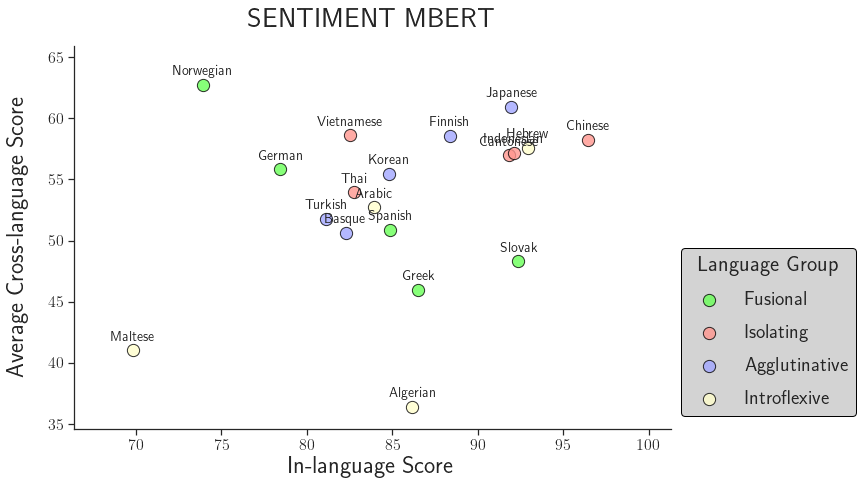

In [8]:
make_plot("sentiment", "mbert", "Macro_F1")
plt.savefig("../../../results/acl/mbert/plots/within_vs_cross_sentiment.pdf", dpi=400, bbox_inches="tight")

(0.4727323710342902, 0.04095502166835985)


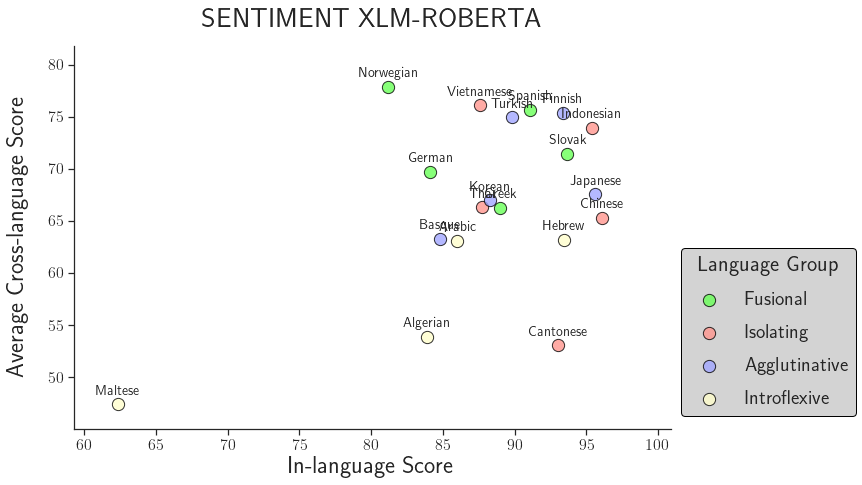

In [9]:
make_plot("sentiment", "xlm-roberta", "Macro_F1")
plt.savefig("../../../results/acl/xlm-roberta/plots/within_vs_cross_sentiment.pdf", dpi=400, bbox_inches="tight")